## Real estate valuation data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.1)

In [ ]:
# Настройка стиля для красивых визуализаций
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

### 1. Загрузка данных в датафрейм

In [ ]:
# Загрузка данных из Excel файла
df = pd.read_excel('Real estate valuation data set.xlsx')

# Просмотр первых строк датасета
print("Первые 5 строк датасета:")
display(df.head())

Первые 5 строк датасета:


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### 2. Статистическая информация о наборе данных

In [ ]:
# Общая информация о датасете
print("="*60)
print("ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("="*60)
df.info()

ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
print("\n" + "="*60)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ")
print("="*60)
display(df.describe().round(2))


ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00
mean,207.50,2013.15,17.71,1083.89,4.09,24.97,121.53,37.98
std,119.66,0.28,11.39,1262.11,2.95,0.01,0.02,13.61
min,1.00,2012.67,0.00,23.38,0.00,24.93,121.47,7.60
25%,104.25,2012.92,9.02,289.32,1.00,24.96,121.53,27.70
50%,207.50,2013.17,16.10,492.23,4.00,24.97,121.54,38.45
75%,310.75,2013.42,28.15,1454.28,6.00,24.98,121.54,46.60
max,414.00,2013.58,43.80,6488.02,10.00,25.01,121.57,117.50


In [ ]:
print("\n" + "="*60)
print("КОЛИЧЕСТВО ПРОПУСКОВ В КАЖДОМ СТОЛБЦЕ")
print("="*60)
print(df.isnull().sum())


КОЛИЧЕСТВО ПРОПУСКОВ В КАЖДОМ СТОЛБЦЕ
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### 3. Названия столбцов и информация о строках

In [ ]:
print("="*60)
print("НАЗВАНИЯ СТОЛБЦОВ")
print("="*60)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

НАЗВАНИЯ СТОЛБЦОВ
1. No
2. X1 transaction date
3. X2 house age
4. X3 distance to the nearest MRT station
5. X4 number of convenience stores
6. X5 latitude
7. X6 longitude
8. Y house price of unit area


In [ ]:
print("\n" + "="*60)
print("ИНФОРМАЦИЯ О СТРОКАХ")
print("="*60)
print(f"Общее количество строк: {df.shape[0]}")
print(f"Общее количество столбцов: {df.shape[1]}")
print(f"\nУникальные значения в каждом столбце:")
for col in df.columns:
    print(f"  • {col}: {df[col].nunique()} уникальных значений")


ИНФОРМАЦИЯ О СТРОКАХ
Общее количество строк: 414
Общее количество столбцов: 8

Уникальные значения в каждом столбце:
  • No: 414 уникальных значений
  • X1 transaction date: 12 уникальных значений
  • X2 house age: 236 уникальных значений
  • X3 distance to the nearest MRT station: 259 уникальных значений
  • X4 number of convenience stores: 11 уникальных значений
  • X5 latitude: 234 уникальных значений
  • X6 longitude: 232 уникальных значений
  • Y house price of unit area: 270 уникальных значений


### 4. Замена категориальных данных количественными

In [ ]:
# Проверка наличия категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    print("Найдены категориальные признаки:", categorical_cols)
    print("\nКодирование категориальных признаков с помощью One-Hot Encoding...")

    # One-Hot Encoding для категориальных признаков
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print(f"Размер датасета после кодирования: {df_encoded.shape}")
else:
    print("Категориальных признаков не обнаружено (все признаки числовые).")
    df_encoded = df.copy()
    print("Датасет готов к анализу без дополнительного кодирования.")

# Сохраняем оригинальный датафрейм для визуализации
df_original = df.copy()

Категориальных признаков не обнаружено (все признаки числовые).
Датасет готов к анализу без дополнительного кодирования.


### 5-7. Визуализация данных (минимум 2 визуализации на каждый признак)

Сначала определим ключевые признаки датасета недвижимости:

In [ ]:
# Определение ключевых признаков (обычно в этом датасете)
key_features = [
    'X1 transaction date',
    'X2 house age',
    'X3 distance to the nearest MRT station',
    'X4 number of convenience stores',
    'X5 latitude',
    'X6 longitude',
    'Y house price of unit area'
]

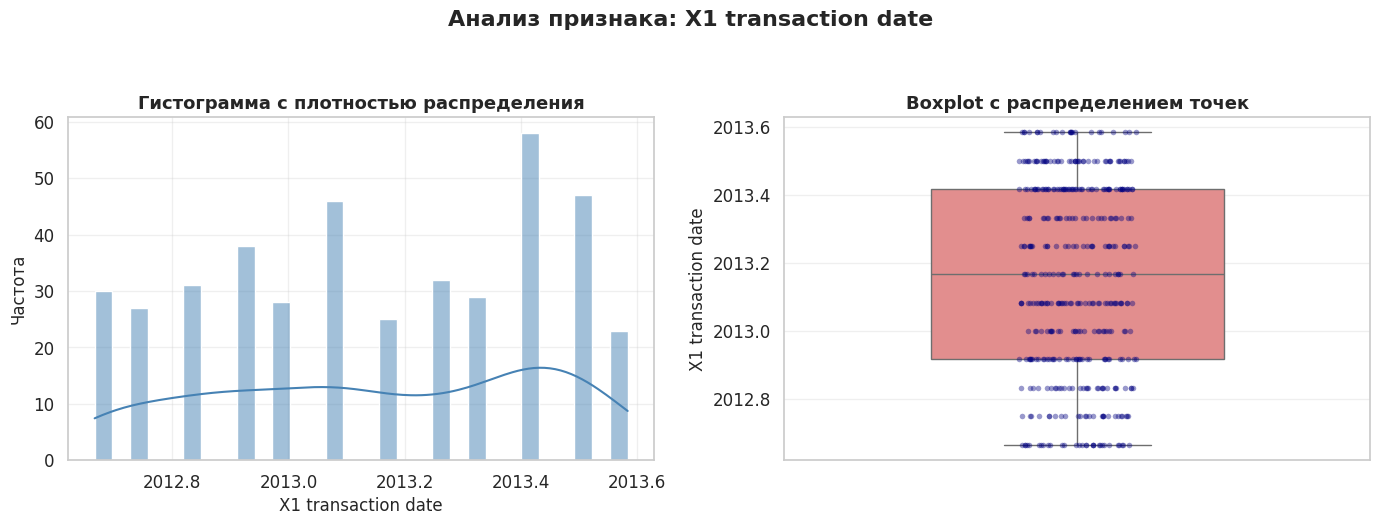

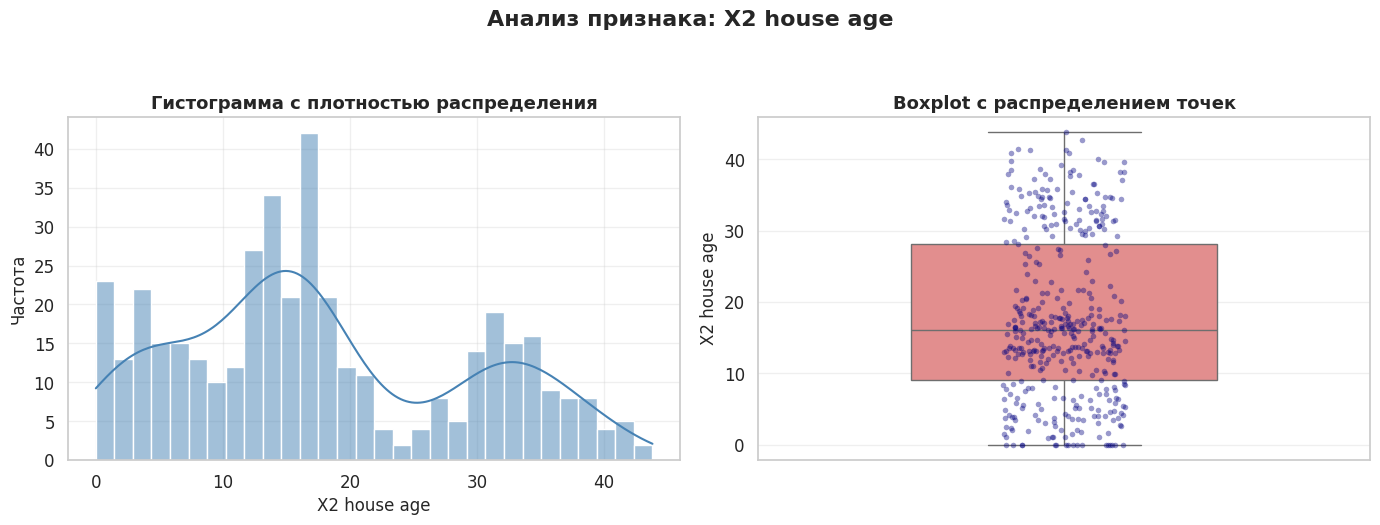

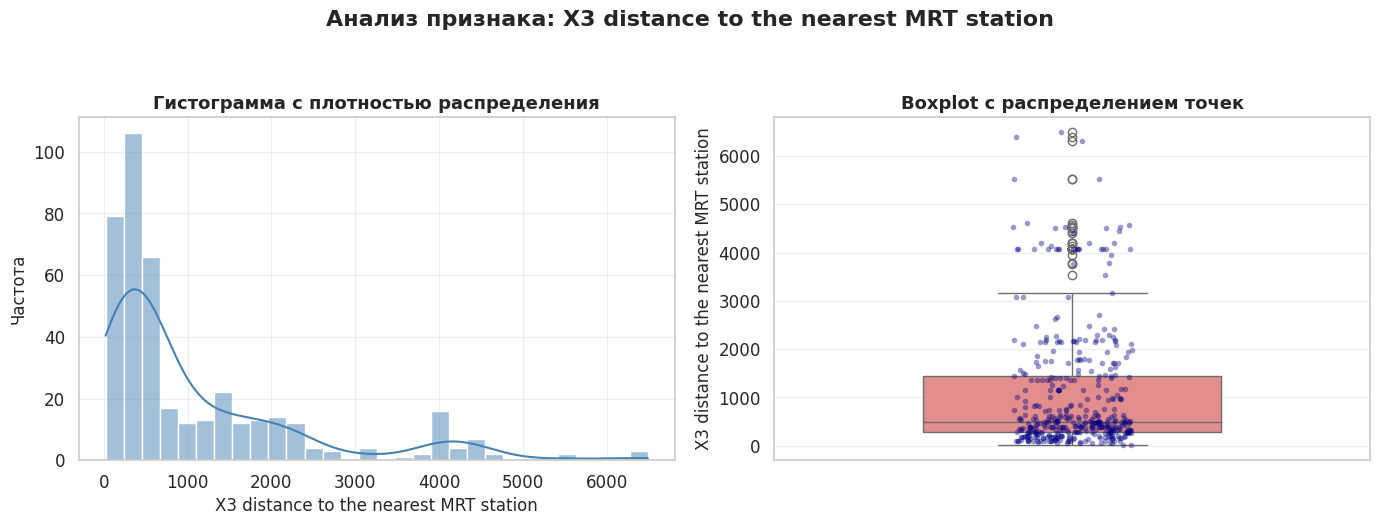

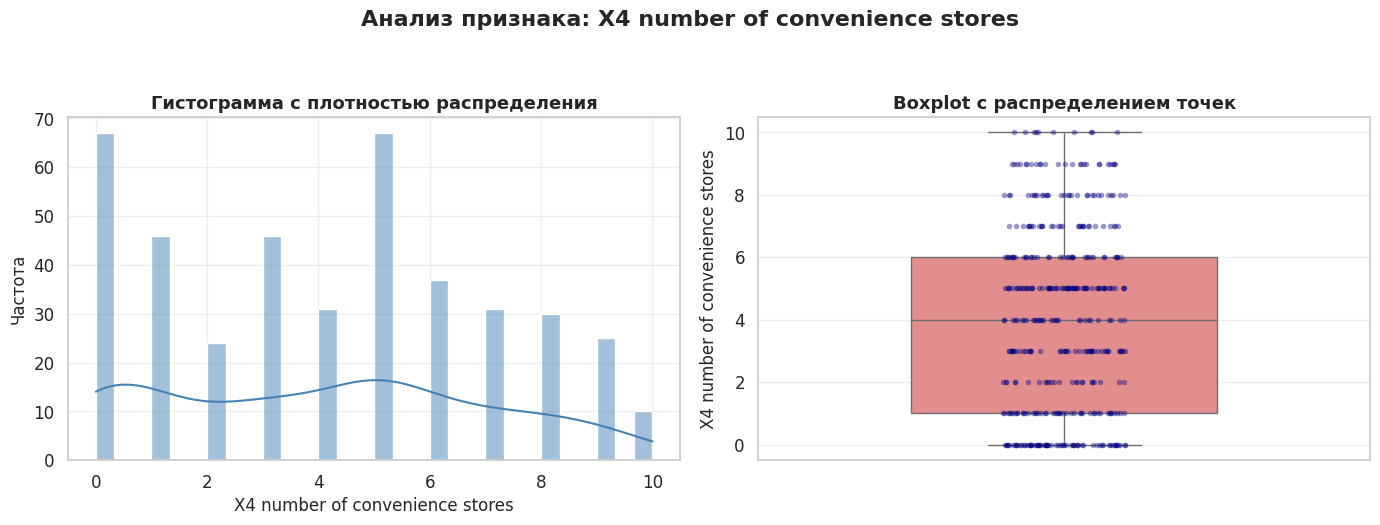

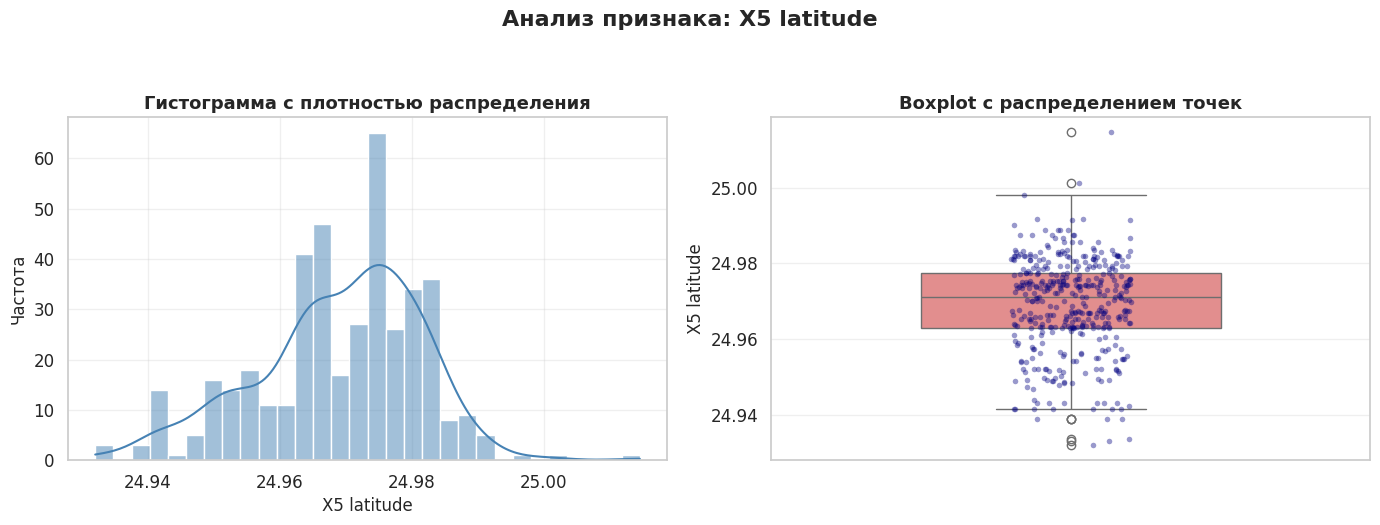

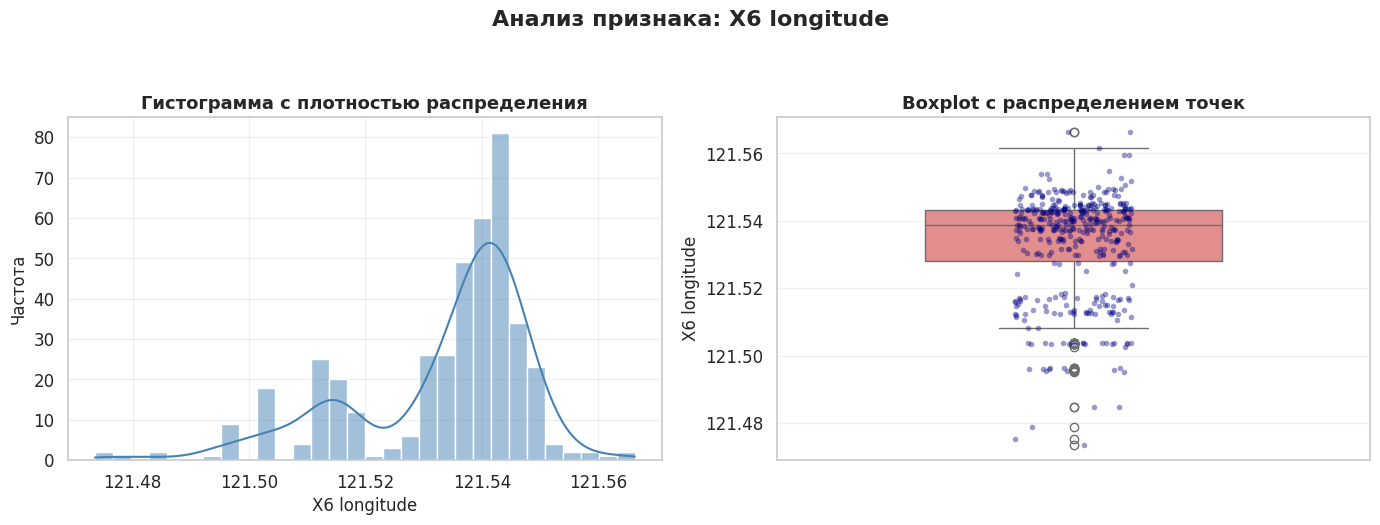

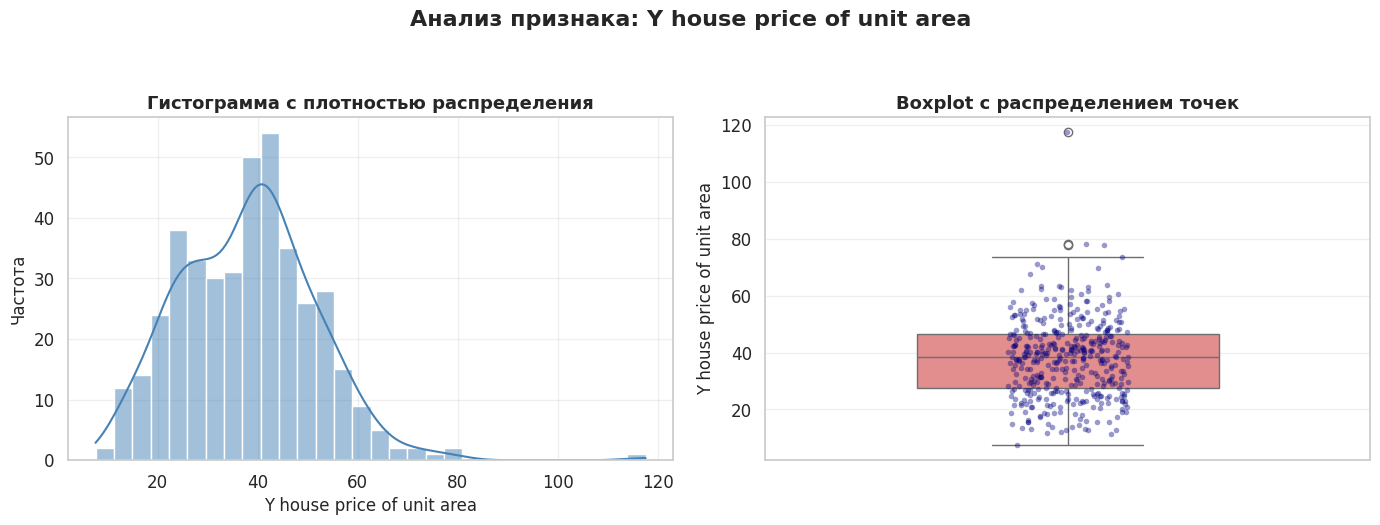

In [ ]:
# Создание красивых визуализаций для каждого признака
for feature in key_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Анализ признака: {feature}', fontsize=16, fontweight='bold', y=1.05)

    # Визуализация 1: Гистограмма с KDE
    sns.histplot(df[feature], kde=True, ax=axes[0], color='steelblue', bins=30)
    axes[0].set_title('Гистограмма с плотностью распределения', fontsize=13, fontweight='bold')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Частота')
    axes[0].grid(True, alpha=0.3)

    # Визуализация 2: Boxplot + Stripplot для детального анализа
    sns.boxplot(y=df[feature], ax=axes[1], color='lightcoral', width=0.5)
    sns.stripplot(y=df[feature], ax=axes[1], color='navy', alpha=0.4, size=4)
    axes[1].set_title('Boxplot с распределением точек', fontsize=13, fontweight='bold')
    axes[1].set_ylabel(feature)
    axes[1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

Дополнительные красивые визуализации для каждого признака

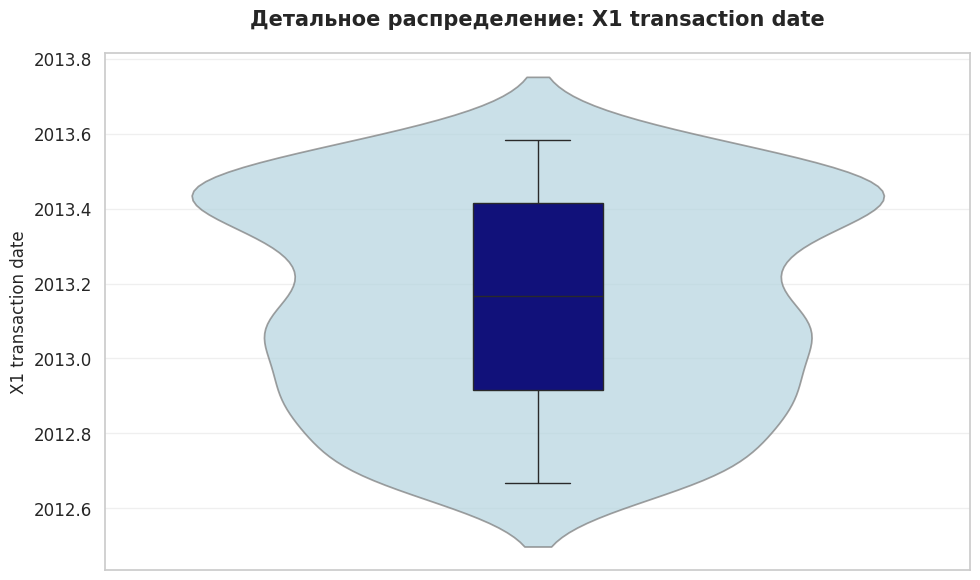

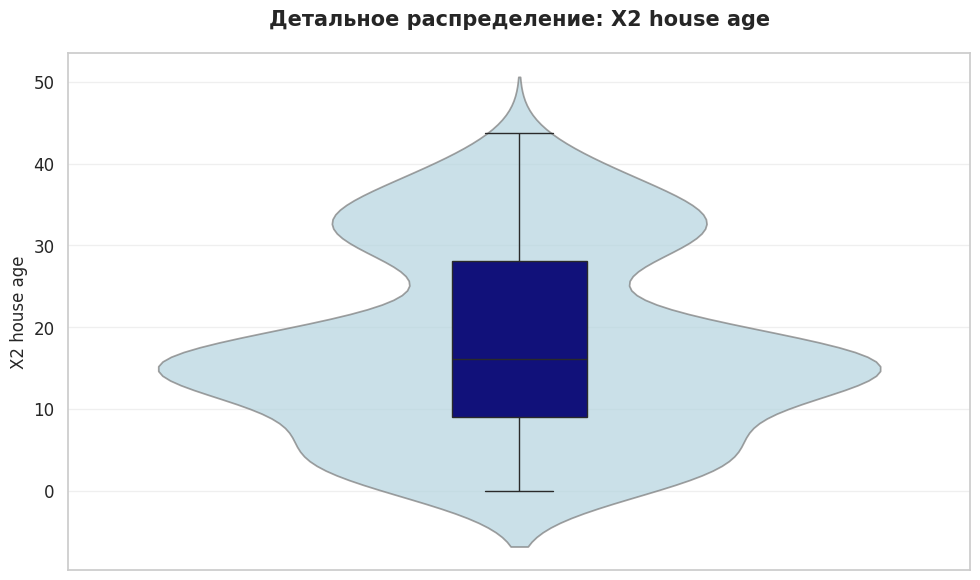

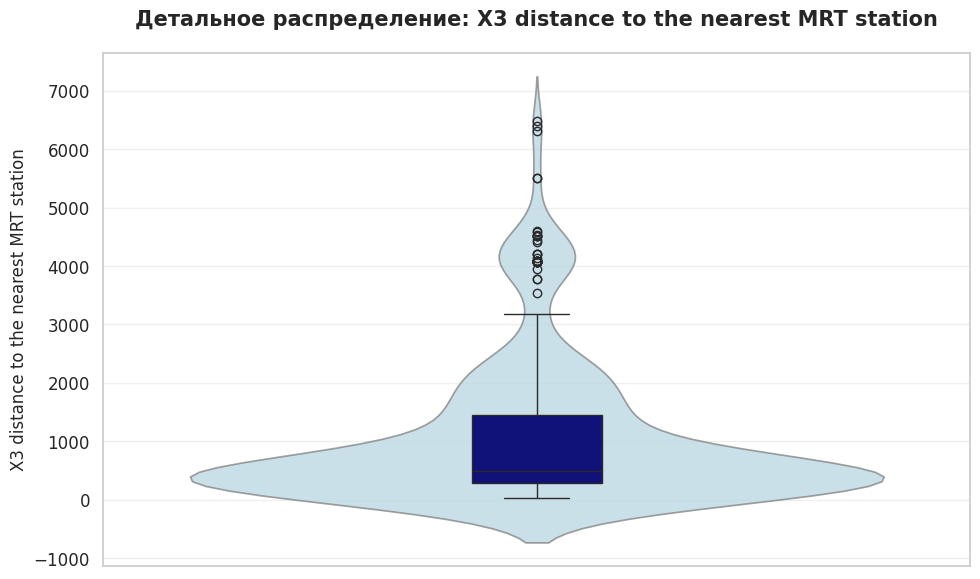

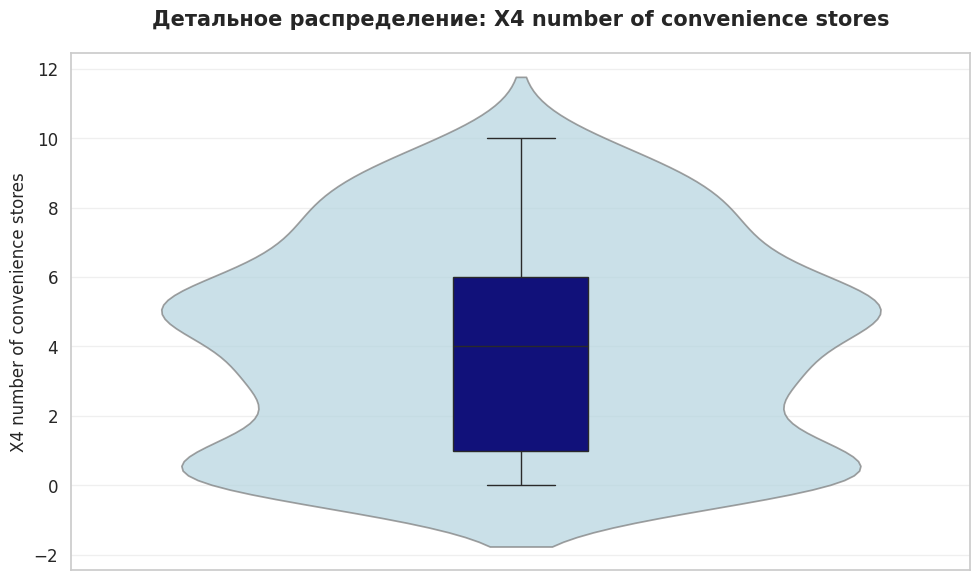

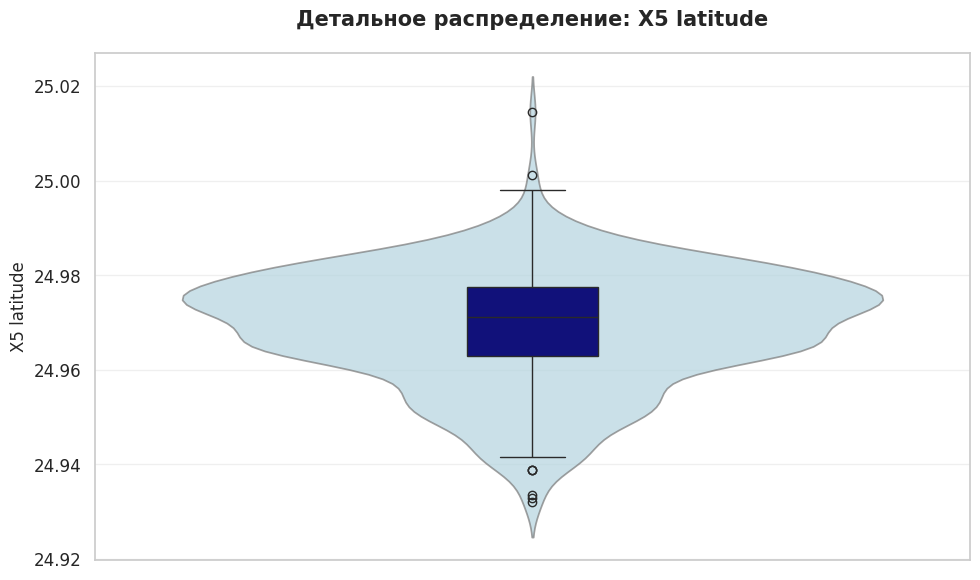

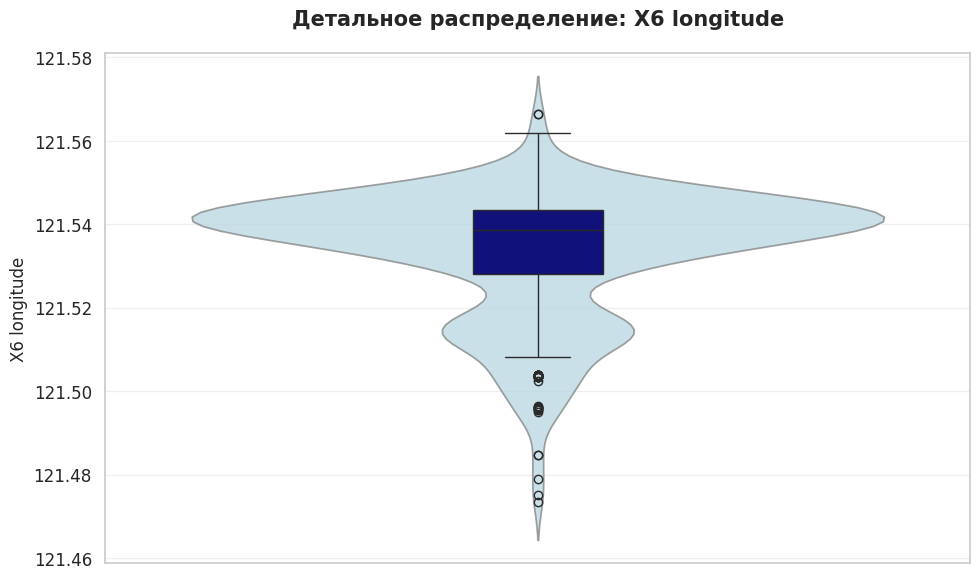

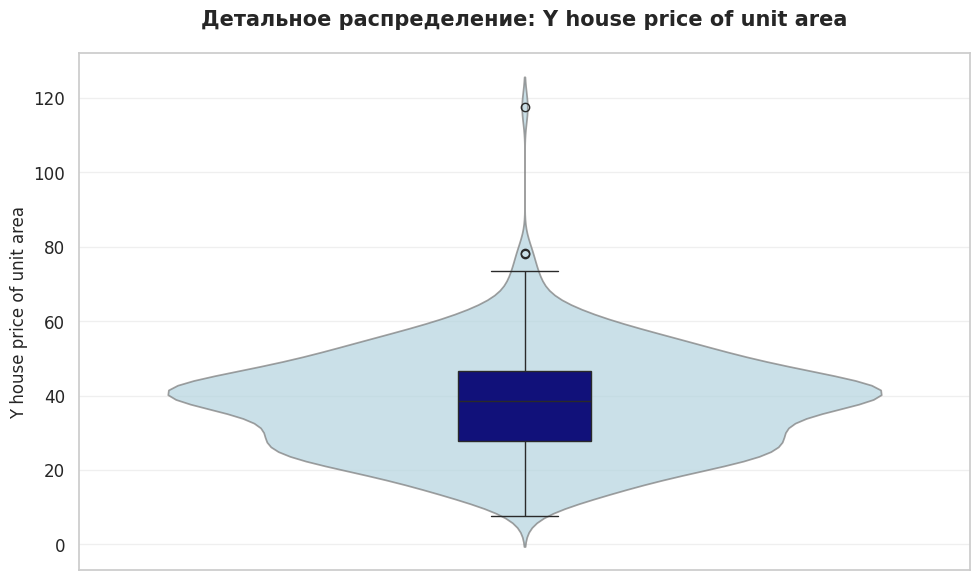

In [ ]:
# Визуализация 3: Распределение с медианой и квартилями
for feature in key_features:
    plt.figure(figsize=(10, 6))

    # Violin plot с наложенным boxplot
    ax = sns.violinplot(data=df, y=feature, inner=None, color='lightblue', alpha=0.7)
    sns.boxplot(data=df, y=feature, width=0.15, color='darkblue', ax=ax)

    plt.title(f'Детальное распределение: {feature}', fontsize=15, fontweight='bold', pad=20)
    plt.ylabel(feature, fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

### 8. Групповые визуализации (минимум 3)

#### Визуализация 1: Тепловая карта корреляции всех признаков

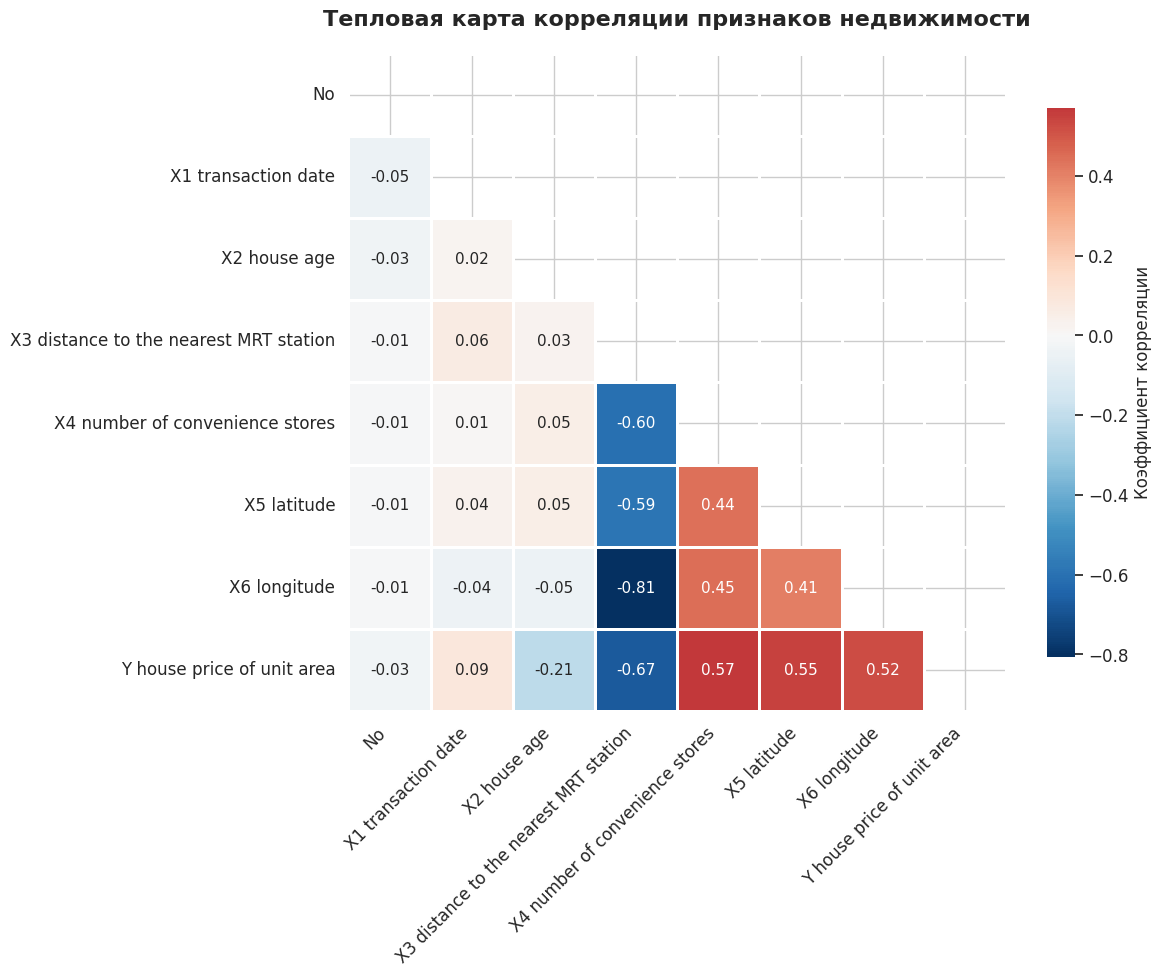

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Красивая тепловая карта с аннотациями
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',  # Красивая цветовая схема
            center=0,
            square=True,
            linewidths=.8,
            cbar_kws={"shrink": .8, "label": "Коэффициент корреляции"},
            annot_kws={"size": 11})

plt.title('Тепловая карта корреляции признаков недвижимости',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Визуализация 2: Взаимосвязь цены с ключевыми факторами

/tmp/ipython-input-1486612096.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='X4 number of convenience stores',


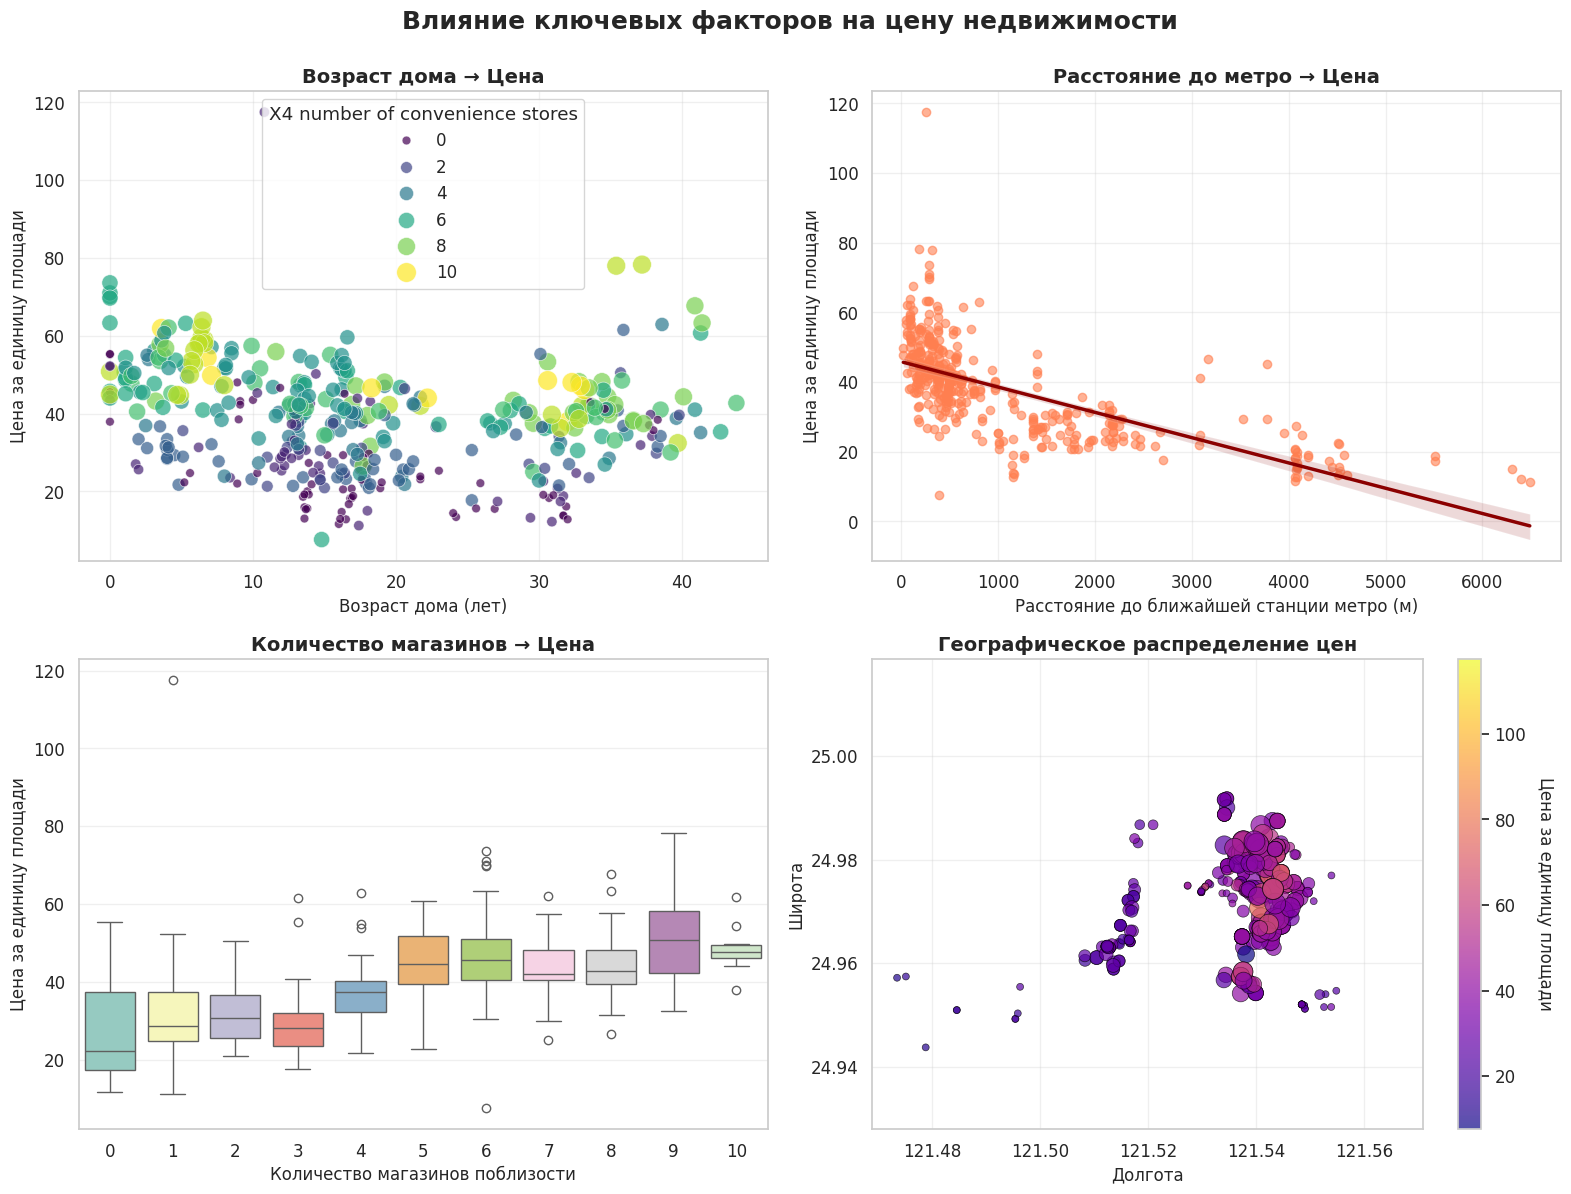

In [ ]:
# Создаем сетку графиков для анализа влияния факторов на цену
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Влияние ключевых факторов на цену недвижимости',
             fontsize=18, fontweight='bold', y=0.995)

# 1. Возраст дома и цена
sns.scatterplot(data=df, x='X2 house age', y='Y house price of unit area',
                hue='X4 number of convenience stores',
                palette='viridis',
                size='X4 number of convenience stores',
                sizes=(40, 200),
                alpha=0.7,
                ax=axes[0, 0])
axes[0, 0].set_title('Возраст дома → Цена', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Возраст дома (лет)')
axes[0, 0].set_ylabel('Цена за единицу площади')
axes[0, 0].grid(True, alpha=0.3)

# 2. Расстояние до метро и цена
sns.regplot(data=df, x='X3 distance to the nearest MRT station',
            y='Y house price of unit area',
            scatter_kws={'alpha':0.6, 'color':'coral'},
            line_kws={'color':'darkred', 'linewidth':2.5},
            ax=axes[0, 1])
axes[0, 1].set_title('Расстояние до метро → Цена', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Расстояние до ближайшей станции метро (м)')
axes[0, 1].set_ylabel('Цена за единицу площади')
axes[0, 1].grid(True, alpha=0.3)

# 3. Количество магазинов и цена
sns.boxplot(data=df, x='X4 number of convenience stores',
            y='Y house price of unit area',
            palette='Set3',
            ax=axes[1, 0])
axes[1, 0].set_title('Количество магазинов → Цена', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Количество магазинов поблизости')
axes[1, 0].set_ylabel('Цена за единицу площади')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Географическое расположение и цена (пузырьковая диаграмма)
scatter = axes[1, 1].scatter(df['X6 longitude'],
                            df['X5 latitude'],
                            c=df['Y house price of unit area'],
                            s=df['X4 number of convenience stores'] * 25,
                            cmap='plasma',
                            alpha=0.7,
                            edgecolors='black',
                            linewidth=0.5)
axes[1, 1].set_title('Географическое распределение цен', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Долгота')
axes[1, 1].set_ylabel('Широта')
axes[1, 1].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1, 1])
cbar.set_label('Цена за единицу площади', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

#### Визуализация 3: Парные взаимосвязи признаков (Pairplot)

<Figure size 1400x1200 with 0 Axes>

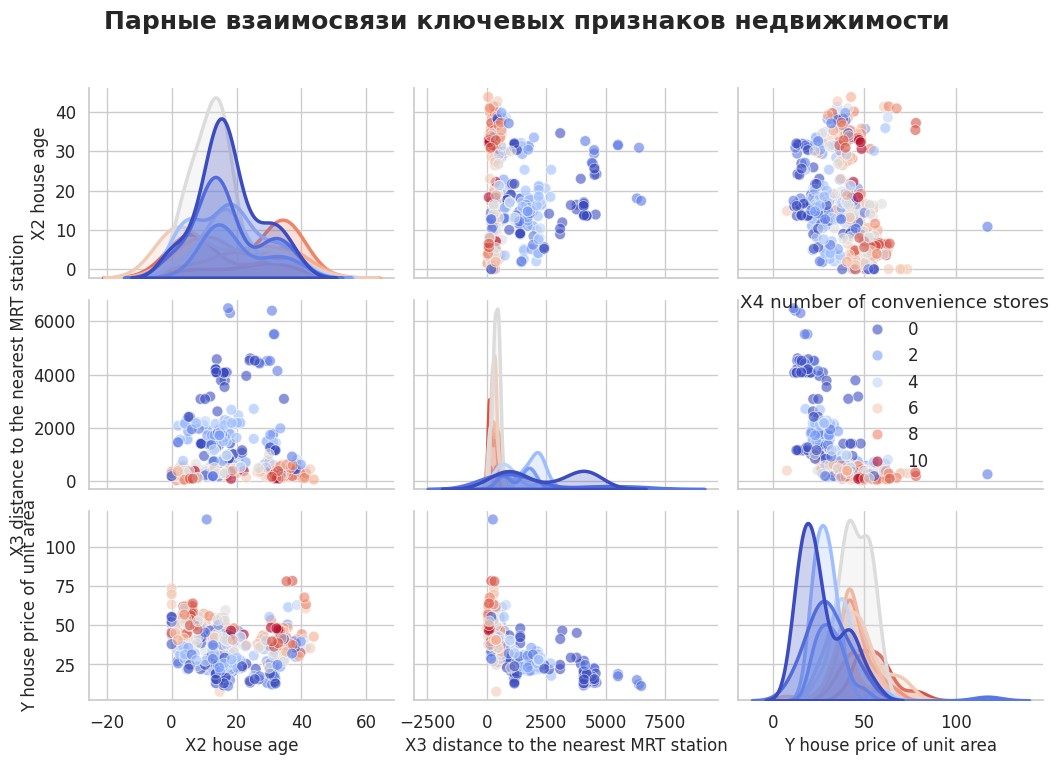

In [ ]:
# Выбираем наиболее важные признаки для парного анализа
pairplot_features = ['X2 house age',
                     'X3 distance to the nearest MRT station',
                     'X4 number of convenience stores',
                     'Y house price of unit area']

plt.figure(figsize=(14, 12))
pairplot = sns.pairplot(df[pairplot_features],
                        hue='X4 number of convenience stores',
                        palette='coolwarm',
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 60},
                        diag_kws={'linewidth': 2.5})

pairplot.fig.suptitle('Парные взаимосвязи ключевых признаков недвижимости',
                      fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### Визуализация 4: Влияние времени (даты транзакции) на цену

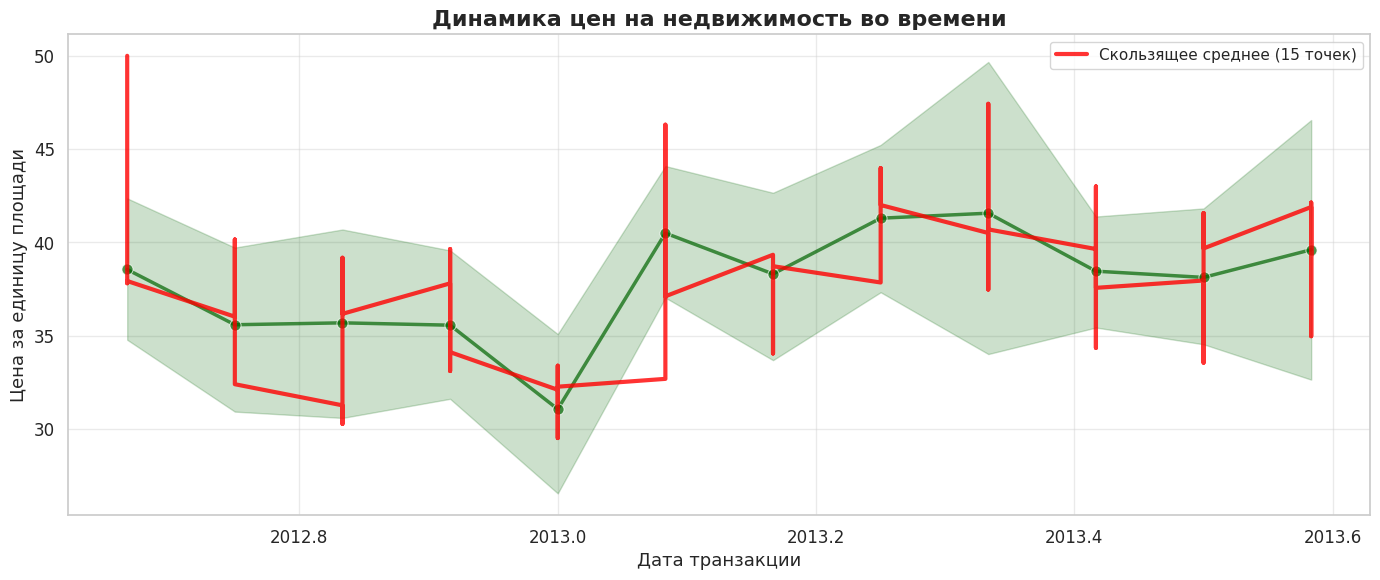

In [ ]:
plt.figure(figsize=(14, 6))

# Линейный график с точками
sns.lineplot(data=df, x='X1 transaction date', y='Y house price of unit area',
             marker='o', linewidth=2.5, markersize=8, color='darkgreen', alpha=0.7)

# Добавляем скользящее среднее для выявления тренда
df_sorted = df.sort_values('X1 transaction date')
df_sorted['rolling_mean'] = df_sorted['Y house price of unit area'].rolling(window=15, min_periods=1).mean()
plt.plot(df_sorted['X1 transaction date'], df_sorted['rolling_mean'],
         color='red', linewidth=3, label='Скользящее среднее (15 точек)', alpha=0.8)

plt.title('Динамика цен на недвижимость во времени', fontsize=16, fontweight='bold')
plt.xlabel('Дата транзакции', fontsize=13)
plt.ylabel('Цена за единицу площади', fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

#### Анализ важнейших факторов цены

КОРРЕЛЯЦИЯ ПРИЗНАКОВ С ЦЕНОЙ НЕДВИЖИМОСТИ
X4 number of convenience stores               | Корреляция:  0.571 | ↑ положительная (сильная)
X5 latitude                                   | Корреляция:  0.546 | ↑ положительная (сильная)
X6 longitude                                  | Корреляция:  0.523 | ↑ положительная (сильная)
X1 transaction date                           | Корреляция:  0.088 | ↑ положительная (слабая)
No                                            | Корреляция: -0.029 | ↓ отрицательная (слабая)
X2 house age                                  | Корреляция: -0.211 | ↓ отрицательная (слабая)
X3 distance to the nearest MRT station        | Корреляция: -0.674 | ↓ отрицательная (сильная)


/tmp/ipython-input-3006831725.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.values, y=price_corr.index, palette=colors, orient='h')


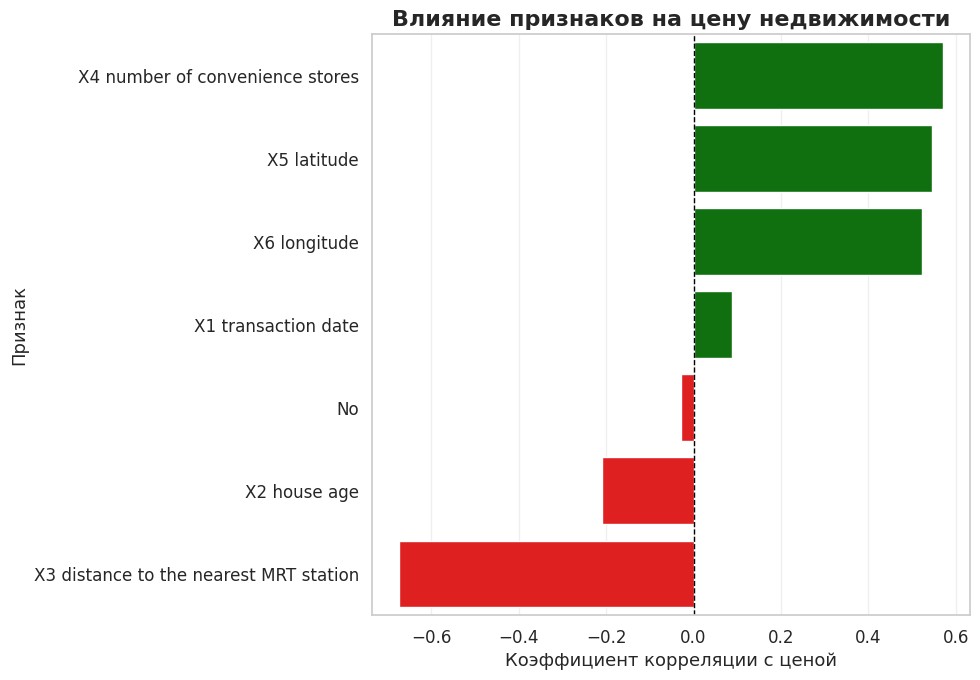

In [ ]:
# Корреляция признаков с целевой переменной (ценой)
price_corr = df.corr(numeric_only=True)['Y house price of unit area'].sort_values(ascending=False)
price_corr = price_corr.drop('Y house price of unit area')

print("="*60)
print("КОРРЕЛЯЦИЯ ПРИЗНАКОВ С ЦЕНОЙ НЕДВИЖИМОСТИ")
print("="*60)
for feature, corr in price_corr.items():
    direction = "↑ положительная" if corr > 0 else "↓ отрицательная"
    strength = "сильная" if abs(corr) > 0.5 else "умеренная" if abs(corr) > 0.3 else "слабая"
    print(f"{feature:45s} | Корреляция: {corr:6.3f} | {direction} ({strength})")

# Визуализация корреляции с ценой
plt.figure(figsize=(10, 7))
colors = ['green' if v > 0 else 'red' for v in price_corr.values]
sns.barplot(x=price_corr.values, y=price_corr.index, palette=colors, orient='h')

plt.title('Влияние признаков на цену недвижимости', fontsize=16, fontweight='bold')
plt.xlabel('Коэффициент корреляции с ценой', fontsize=13)
plt.ylabel('Признак', fontsize=13)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Выводы по анализу

***Структура данных:***

Датасет содержит информацию о 414 объектах недвижимости с 7 признаками, включая географические координаты, возраст здания, инфраструктуру и цену.

***Ключевые факторы цены:***

Сильное влияние: Количество магазинов поблизости (положительная корреляция)

Умеренное влияние: Расстояние до метро (отрицательная корреляция — чем ближе, тем дороже)

Слабое влияние: Возраст дома (незначительная отрицательная корреляция)

***Географические закономерности:***

Цены выше в районах с развитой инфраструктурой (больше магазинов) и близостью к метро.

***Временной тренд:***

Анализ динамики цен во времени показывает общую тенденцию к росту стоимости недвижимости.
Отсутствие категориальных признаков: Все признаки в датасете числовые, что упрощает предобработку данных.